In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
infile='/Users/gmontes/Dropbox/JOBS/DATAINC/challenge2018/employment_evolution/oesdat_2007-2017.output.xlsx'
dat=pd.read_excel(infile)

In [6]:
dat.head()

,PRIM_STATE,AREA_NAME,OCC_CODE,OCC_TITLE,TOT_EMP,YEAR
0,AK,"Anchorage, AK",00-0000,All Occupations,176310,2014
1,AK,"Anchorage, AK",11-0000,Management Occupations,10000,2014
2,AK,"Anchorage, AK",13-0000,Business and Financial Operations Occupations,8320,2014
3,AK,"Anchorage, AK",15-0000,Computer and Mathematical Occupations,3190,2014
4,AK,"Anchorage, AK",17-0000,Architecture and Engineering Occupations,5140,2014


In [7]:
dat=dat.replace({'TOT_EMP': {'**': '0'}}) 

In [8]:
dat.TOT_EMP=dat.TOT_EMP.astype(int)

In [9]:
dat['TOT_EMP']=dat['TOT_EMP'].fillna(0)

In [11]:
#temp=dat.groupby(['YEAR'])
temp=dat.groupby(['YEAR','OCC_CODE'],as_index=False)['TOT_EMP'].sum()

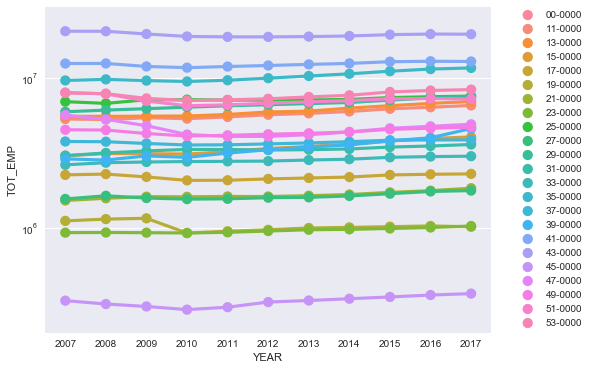

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.pointplot(x="YEAR",y="TOT_EMP",hue="OCC_CODE",data=temp).set(ylim=(2e5, 3e7),yscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

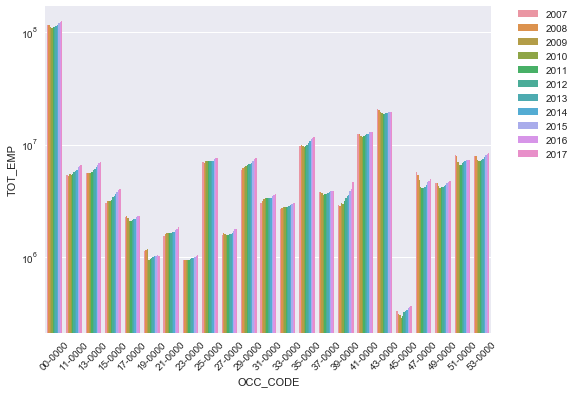

In [19]:
sns.barplot(x="OCC_CODE", y="TOT_EMP",hue="YEAR", data=temp).set(yscale="log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [16]:
temp2=temp.loc[temp['OCC_CODE'] != '00-0000'].reset_index(drop=True)
piv = pd.pivot_table(temp2, values="TOT_EMP",index=["OCC_CODE"], columns=["YEAR"], fill_value=0)

In [18]:
#ax = sns.heatmap(piv,norm=matplotlib.colors.LogNorm(),cmap="viridis")